In [198]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.ticker
plt.rcParams['figure.figsize'] = [14, 8]

In [410]:
## load the data as a csv
df = pd. read_csv("C:\\Users\\Aman\\Downloads\\BTC_USD.csv")

In [411]:
df.head()
#need to reverse the data later onddd
#remove entries where price is 0
df = df[df["Value"] > 0]
df = df.iloc[::-1]
#convert Date to date format
df["Date"] = pd.to_datetime(df["Date"])
df.head()


,Date,Value
4082,2010-08-16,0.0769
4080,2010-08-18,0.0688
4079,2010-08-19,0.0667
4078,2010-08-20,0.0700
4077,2010-08-21,0.0664


In [412]:
#this is the function we want to fit over our data: a.log(x)+b
#we need to find appropriate coefficients
def func(x, p1, p2):
    return p1*np.log(x) + p2

In [413]:
#we are fitting log of price of BTC against the function, not actual price
ydata = np.log(df["Value"])
xdata = [x+1 for x in range(len(df))] #just use numbers for dates

extended_dates = pd.date_range(df["Date"].iloc[0], "2023-01-01")

#extract optimal coefficients using curve fit
popt, pcov = curve_fit(func, xdata, ydata, p0=(3.0, -10))

#try to get ydata from xdata and function
#popt has coefficients, pcov has covariances between them
print(popt)

[  3.03401507 -16.04268679]


In [414]:
#generate fitted Y data
fittedYdata = func(np.array([x+1 for x in range(len(df))]), popt[0], popt[1])#pass values to function
fittedYdataExtended = func(np.array([x+1 for x in range(len(extended_dates))]), popt[0], popt[1])

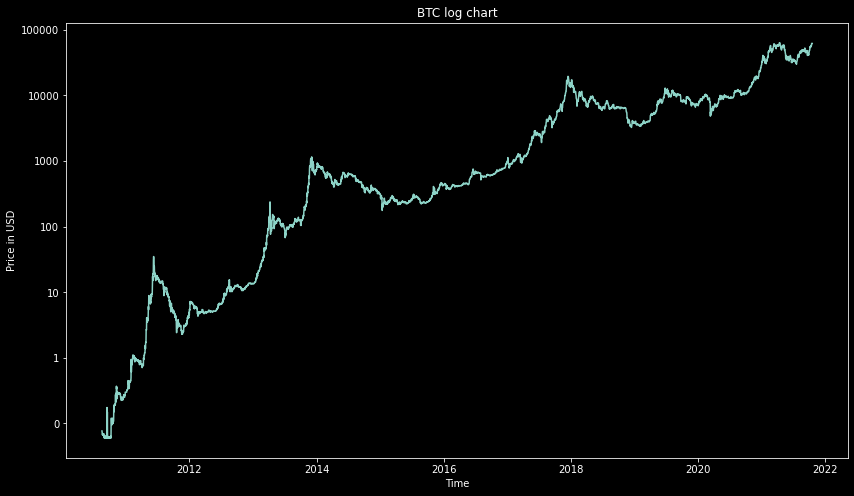

In [538]:
plt.style.use("dark_background")
fig, ax = plt.subplots()
ax.semilogy(df["Date"], df["Value"])
plt.yscale('log', subsy=[1])
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.ScalarFormatter())
plt.title("BTC log chart")
plt.ylabel("Price in USD")
plt.show()

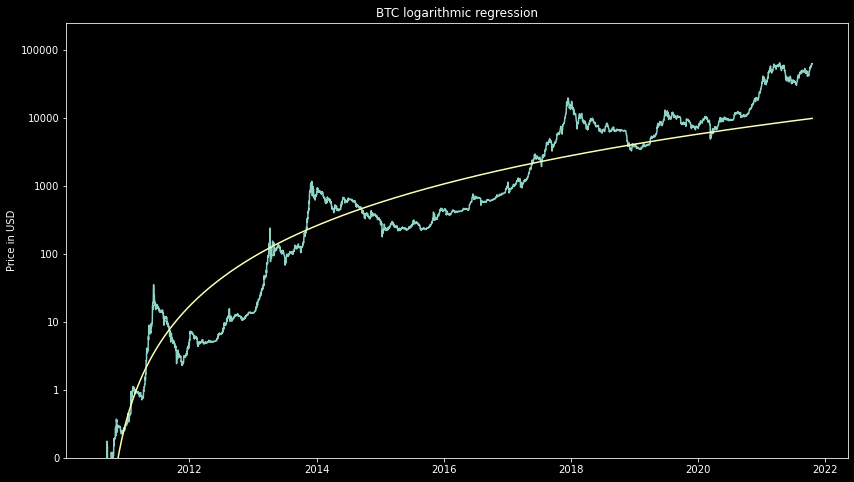

In [539]:
plt.style.use("dark_background")
fig, ax = plt.subplots()
ax.semilogy(df["Date"], df["Value"])
plt.yscale('log', subsy=[1])
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.ScalarFormatter())
plt.plot(df["Date"], np.exp(fittedYdata))

plt.title("BTC logarithmic regression")
plt.ylabel("Price in USD")
plt.ylim(bottom=0.1)
plt.show()

[  3.71800523 -22.10082725]
1452


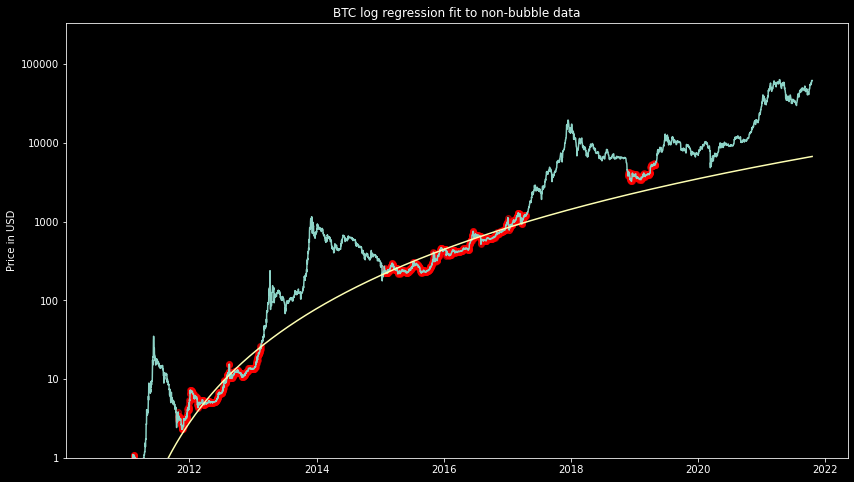

In [541]:
#we are fitting log of price of BTC against the function, not actual price
#df1 = df1.drop(df1[(df1["Age"] > 30) & (df1["Age"] < 300)].index)

df2 = df.drop(df[(df["Date"] > "2013-02-14") & (df["Date"] < "2015-01-26")].index)
df2 = df2.drop(df2[(df2["Date"] > "2011-02-17") & (df2["Date"] < "2011-10-26")].index)
df2 = df2.drop(df2[(df2["Date"] > "2017-04-17") & (df2["Date"] < "2018-11-26")].index)
df2 = df2.drop(df2[(df2["Date"] > "2019-05-01")].index)
df2 = df2.drop(df2[(df2["Date"] < "2011-02-14")].index)

ydata = np.log(df2["Value"])
#xdata = [x+1 for x in range(len(df2))] #just use numbers for dates

all_dates = df["Date"].tolist()
nb_dates = df2["Date"].tolist()
xdata = [all_dates.index(x)+1 for x in nb_dates]

popt, pcov = curve_fit(func, xdata, ydata, p0=(3.0, -10))

print(popt)

fittedYdataNonBubble = func(np.array([x+1 for x in range(len(df))]), popt[0], popt[1])#pass values to function
plt.scatter(df2["Date"], df2["Value"], c='red', alpha=0.5)
plt.style.use("dark_background")
plt.semilogy(df["Date"], df["Value"])
##############################################
ax = plt.gca()
ax.set_yscale('log')
plt.yscale('log', subsy=[1])
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.ScalarFormatter())
plt.plot(df["Date"], np.exp(fittedYdataNonBubble))
##############################################
plt.title("BTC log regression fit to non-bubble data")
plt.ylabel("Price in USD")
plt.ylim(bottom=1)
plt.show()

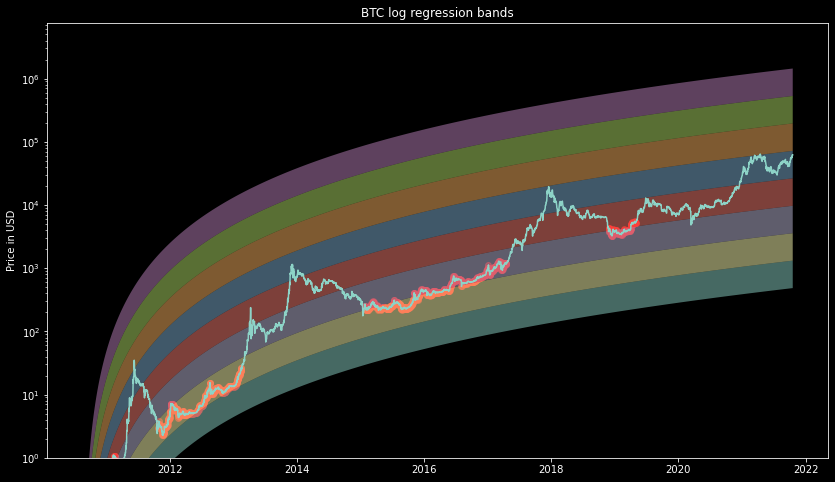

In [548]:
#plot the data

plt.style.use("dark_background")
plt.scatter(df2["Date"], df2["Value"], c='red', alpha=0.5)
plt.semilogy(df["Date"], df["Value"])
for i in range(-2,6):
    #plt.plot(df["Date"], np.exp(fittedYdata))
    plt.fill_between(df["Date"], np.exp(fittedYdata+i-1), np.exp(fittedYdata+i), alpha=0.5)
plt.ylim(bottom=1)
plt.title("BTC log regression bands")
plt.ylabel("Price in USD")
plt.show()

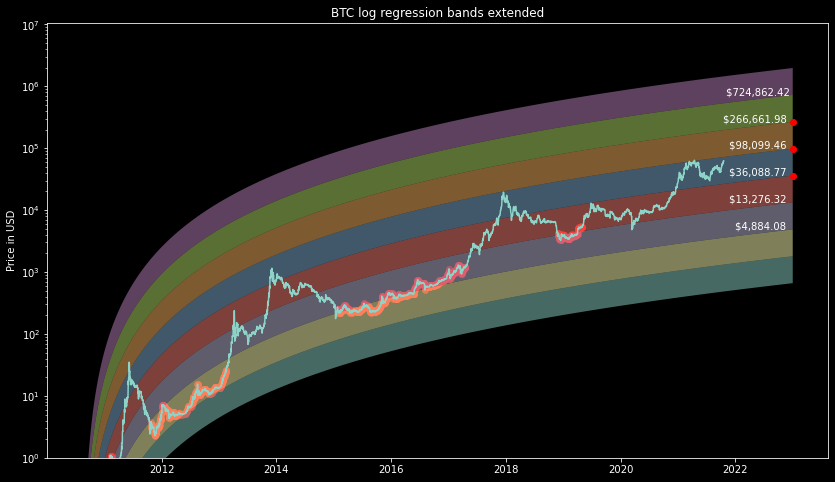

In [546]:
#extendening the dates
plt.style.use("dark_background")

#first plot the price
plt.semilogy(df["Date"], df["Value"])
plt.scatter(df2["Date"], df2["Value"], c='red', alpha=0.5)
for i in range(-2,6):
    #plt.plot(df["Date"], np.exp(fittedYdata))
    plt.fill_between(extended_dates, np.exp(fittedYdataExtended+i-1), np.exp(fittedYdataExtended+i), alpha=0.5)
    
#plt.plot(extended_dates[-1], np.exp(fittedYdataExtended[-1]-1), 'ro', label = np.exp(fittedYdataExtended[-1]-1))
plt.text(extended_dates[-1], np.exp(fittedYdataExtended[-1]-1), f"${np.exp(fittedYdataExtended[-1]-1):,.2f}  ", horizontalalignment='right')
#plt.plot(extended_dates[-1], np.exp(fittedYdataExtended[-1]), 'ro')
plt.text(extended_dates[-1], np.exp(fittedYdataExtended[-1]), f"${np.exp(fittedYdataExtended[-1]):,.2f}  ", horizontalalignment='right')
plt.plot(extended_dates[-1], np.exp(fittedYdataExtended[-1]+1), 'ro')
plt.text(extended_dates[-1], np.exp(fittedYdataExtended[-1]+1), f"${np.exp(fittedYdataExtended[-1]+1):,.2f}  ", horizontalalignment='right')
plt.plot(extended_dates[-1], np.exp(fittedYdataExtended[-1]+2), 'ro')
plt.text(extended_dates[-1], np.exp(fittedYdataExtended[-1]+2), f"${np.exp(fittedYdataExtended[-1]+2):,.2f}  ", horizontalalignment='right')
plt.plot(extended_dates[-1], np.exp(fittedYdataExtended[-1]+3), 'ro')
plt.text(extended_dates[-1], np.exp(fittedYdataExtended[-1]+3), f"${np.exp(fittedYdataExtended[-1]+3):,.2f}  ", horizontalalignment='right')
#plt.plot(extended_dates[-1], np.exp(fittedYdataExtended[-1]+4), 'ro')
plt.text(extended_dates[-1], np.exp(fittedYdataExtended[-1]+4), f"${np.exp(fittedYdataExtended[-1]+4):,.2f} ", horizontalalignment='right')

plt.ylim(bottom=1)
plt.title("BTC log regression bands extended")
plt.ylabel("Price in USD")
plt.show()

In [96]:
value = np.exp(fittedYdataExtended[-1]+4)
print(f"{np.exp(fittedYdataExtended[-1]+4):,.2f}")

724,862.42


In [392]:
data = [['tom', 10], ['nick', 15], ['juli', 14], ['juli', 142], ['juli', 134], ['juli', 414]]
df1 = pd.DataFrame(data, columns = ['Name', 'Age'])
df1

,Name,Age
0,tom,10
1,nick,15
2,juli,14
3,juli,142
4,juli,134
5,juli,414


In [453]:
df1 = df1.drop(df1[(df1["Age"] > 30) & (df1["Age"] < 300)].index).reindex()
df1


,Name,Age
0,tom,10
1,nick,15
2,juli,14
5,juli,414


In [473]:
df1["Age"].tolist().index(414)
l1 = [15,14]
df["Date"].tolist().index(df["Date"].tolist()[0])
#[df1["Age"].tolist().index(x)+1 for x in l1 ]

0

In [394]:
a = df1.index
type(list(a))
aa=list(a)
[x+1 for x in aa]

[1, 2, 3, 6]

In [549]:
import quandl

In [556]:
df = quandl.get("BITFINEX/ETHUSD")
df = df.reset_index()
df["Value"] = df["Last"]
df = df[df["Value"] > 0]
df = df.loc[:,["Date", "Value"]]
df["Date"] = pd.to_datetime(df["Date"])
df

,Date,Value
0,2016-03-14,12.925000
1,2016-03-15,12.765000
2,2016-03-16,12.800000
3,2016-03-17,11.368000
4,2016-03-18,10.750000
...,...,...
1999,2021-10-15,3853.500000
2000,2021-10-16,3829.389265
2001,2021-10-17,3808.600000
2002,2021-10-18,3732.700000


In [558]:
df = df[df["Value"] > 0]
ydata = np.log(df["Value"])
xdata = [x+1 for x in range(len(df))] #just use numbers for dates

extended_dates = pd.date_range(df["Date"].iloc[0], "2023-01-01")

#extract optimal coefficients using curve fit
popt, pcov = curve_fit(func, xdata, ydata, p0=(3.0, -10))

#try to get ydata from xdata and function
#popt has coefficients, pcov has covariances between them
print(popt)

[ 1.28103733 -3.15755307]


In [559]:
fittedYdata = func(np.array([x+1 for x in range(len(df))]), popt[0], popt[1])#pass values to function
fittedYdataExtended = func(np.array([x+1 for x in range(len(extended_dates))]), popt[0], popt[1])

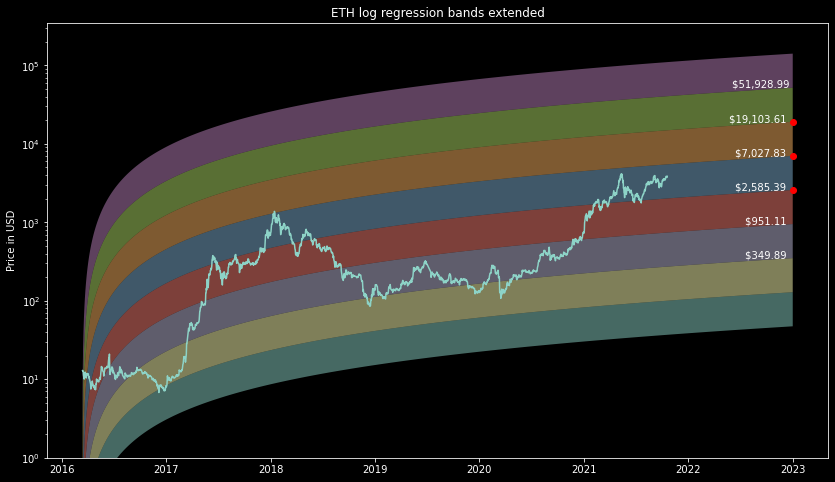

In [562]:
#extendening the dates
plt.style.use("dark_background")

#first plot the price
plt.semilogy(df["Date"], df["Value"])
for i in range(-2,6):
    #plt.plot(df["Date"], np.exp(fittedYdata))
    plt.fill_between(extended_dates, np.exp(fittedYdataExtended+i-1), np.exp(fittedYdataExtended+i), alpha=0.5)
    
#plt.plot(extended_dates[-1], np.exp(fittedYdataExtended[-1]-1), 'ro', label = np.exp(fittedYdataExtended[-1]-1))
plt.text(extended_dates[-1], np.exp(fittedYdataExtended[-1]-1), f"${np.exp(fittedYdataExtended[-1]-1):,.2f}  ", horizontalalignment='right')
#plt.plot(extended_dates[-1], np.exp(fittedYdataExtended[-1]), 'ro')
plt.text(extended_dates[-1], np.exp(fittedYdataExtended[-1]), f"${np.exp(fittedYdataExtended[-1]):,.2f}  ", horizontalalignment='right')
plt.plot(extended_dates[-1], np.exp(fittedYdataExtended[-1]+1), 'ro')
plt.text(extended_dates[-1], np.exp(fittedYdataExtended[-1]+1), f"${np.exp(fittedYdataExtended[-1]+1):,.2f}  ", horizontalalignment='right')
plt.plot(extended_dates[-1], np.exp(fittedYdataExtended[-1]+2), 'ro')
plt.text(extended_dates[-1], np.exp(fittedYdataExtended[-1]+2), f"${np.exp(fittedYdataExtended[-1]+2):,.2f}  ", horizontalalignment='right')
plt.plot(extended_dates[-1], np.exp(fittedYdataExtended[-1]+3), 'ro')
plt.text(extended_dates[-1], np.exp(fittedYdataExtended[-1]+3), f"${np.exp(fittedYdataExtended[-1]+3):,.2f}  ", horizontalalignment='right')
#plt.plot(extended_dates[-1], np.exp(fittedYdataExtended[-1]+4), 'ro')
plt.text(extended_dates[-1], np.exp(fittedYdataExtended[-1]+4), f"${np.exp(fittedYdataExtended[-1]+4):,.2f} ", horizontalalignment='right')

plt.ylim(bottom=1)
plt.title("ETH log regression bands extended")
plt.ylabel("Price in USD")
plt.show()